In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Ambil Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Praktikum 2/iris_species.csv')
X = df.iloc[:, 1:3].values
y = df.iloc[:, -1].values

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())

In [6]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

## Proses KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # p = 1 is manhattan distance, p = 2 is Euclidean
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Report Hasil Data Train

Text(0.5, 1.0, 'Confusion Matrix')

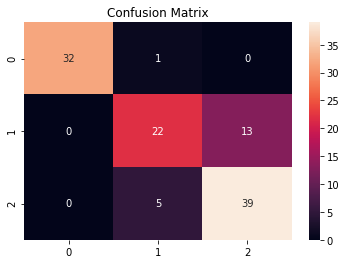

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_title('Confusion Matrix')

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_train.ravel(), y_pred.ravel(), target_names=np.unique(df.iloc[:, -1].values)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.97      0.98        33
Iris-versicolor       0.79      0.63      0.70        35
 Iris-virginica       0.75      0.89      0.81        44

       accuracy                           0.83       112
      macro avg       0.85      0.83      0.83       112
   weighted avg       0.83      0.83      0.83       112



## Report Hasil Data Test

Text(0.5, 1.0, 'Confusion Matrix')

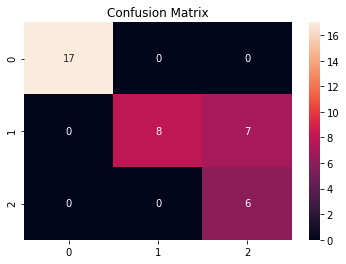

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_title('Confusion Matrix')

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test.ravel(), y_pred.ravel(), target_names=np.unique(df.iloc[:, -1].values)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.53      0.70        15
 Iris-virginica       0.46      1.00      0.63         6

       accuracy                           0.82        38
      macro avg       0.82      0.84      0.78        38
   weighted avg       0.91      0.82      0.82        38



## Plot Decision Boundary

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


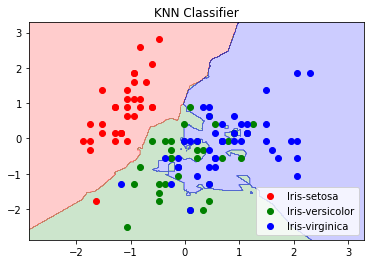

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.2, cmap=ListedColormap(('red', 'green','blue')))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c=ListedColormap(('red', 'green','blue'))(i), label=np.unique(df.iloc[:, -1].values)[j])
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('KNN Classifier')
plt.legend()
plt.show()